In [1]:
#pip install split-folders[full]

In [1]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

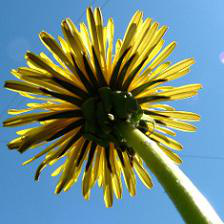

In [2]:
# daisy
img_daisy = image.load_img("C:\\Users\\Administrator\\Desktop\\Test\\dandelion\\142390525_5d81a3659d_m.jpg")
img_daisy

In [4]:
# split data in a new folder named data-split
splitfolders.ratio("C:/Users/Administrator/Desktop/Test", output="C:/Users/Administrator/Desktop/Test/data-split", seed=1337, ratio=(0.7, 0.2, 0.1), group_prefix=None, move=False)

Copying files: 4317 files [00:04, 977.49 files/s] 


In [5]:
datagen = ImageDataGenerator()

In [39]:
# define classes name
class_names = ['daisy','dandelion','rose','sunflower','tulip']

In [7]:
# training data
train_generator = datagen.flow_from_directory( 
    directory="C:/Users/Administrator/Desktop/Test/data-split/train/", 
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="binary", 
)

Found 1270 images belonging to 5 classes.


In [8]:
# validation data
valid_generator = datagen.flow_from_directory( 
    directory="C:/Users/Administrator/Desktop/Test/data-split/val/", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

Found 362 images belonging to 5 classes.


In [12]:
# test data
test_generator = datagen.flow_from_directory( 
    directory="C:/Users/Administrator/Desktop/Test/data-split/test/", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

Found 184 images belonging to 5 classes.


In [13]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [14]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(5, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

In [15]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data=valid_generator, epochs=epochs, batch_size=batch_size)

In [16]:
# launch the training
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")

Epoch 1/10
40/40 [==============================] - 114s 3s/step - loss: 1.3654 - accuracy: 0.5370 - val_loss: 0.6025 - val_accuracy: 0.8260
Epoch 2/10
40/40 [==============================] - 102s 3s/step - loss: 0.6224 - accuracy: 0.7205 - val_loss: 0.2597 - val_accuracy: 0.9061
Epoch 3/10
40/40 [==============================] - 103s 3s/step - loss: 0.4109 - accuracy: 0.8181 - val_loss: 0.2339 - val_accuracy: 0.9061
Epoch 4/10
40/40 [==============================] - 103s 3s/step - loss: 0.3235 - accuracy: 0.8591 - val_loss: 0.1877 - val_accuracy: 0.9227
Epoch 5/10
40/40 [==============================] - 103s 3s/step - loss: 0.2632 - accuracy: 0.9024 - val_loss: 0.1967 - val_accuracy: 0.9282
Epoch 6/10
40/40 [==============================] - 103s 3s/step - loss: 0.2234 - accuracy: 0.9165 - val_loss: 0.1800 - val_accuracy: 0.9227
Epoch 7/10
40/40 [==============================] - 102s 3s/step - loss: 0.1875 - accuracy: 0.9276 - val_loss: 0.1997 - val_accuracy: 0.9199
Epoch 8/10
40

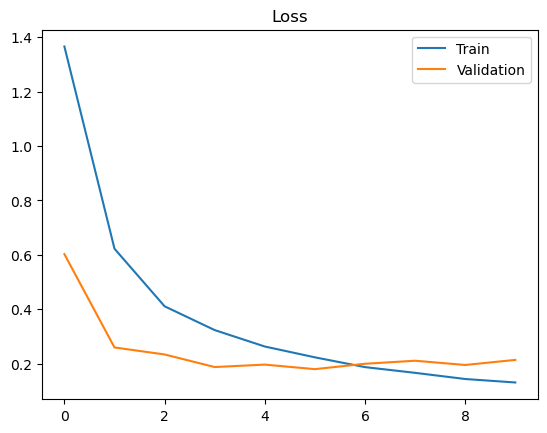

In [17]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

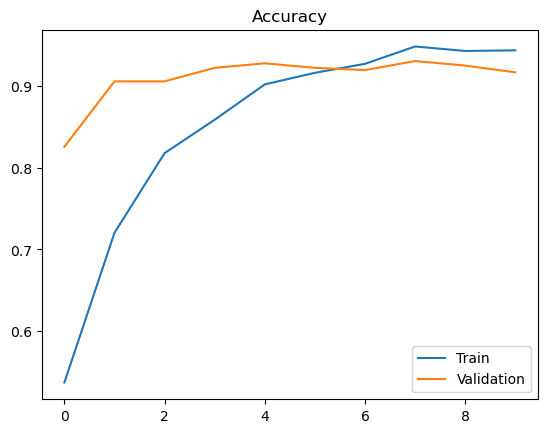

In [18]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

In [19]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

6/6 [==============================] - 13s 2s/step - loss: 0.1697 - accuracy: 0.9511
The test loss is:  0.16967704892158508
The best accuracy is:  95.1086938381195


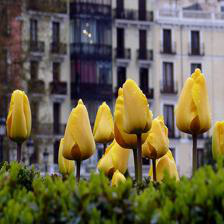

In [40]:
img = tf.keras.preprocessing.image.load_img('C:/Users/Administrator/Desktop/Test/data-split/val/tulip/471298577_cc7558bcf1.jpg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [41]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 0s 137ms/step
[[0.2799663  0.68951845 0.01324052 0.00987413 0.00740055]]


In [42]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[1]


In [43]:
# transform classes number into classes name
class_names[class_id.item()]

'dandelion'

In [25]:
model.save('my_flower_model.keras')

In [30]:
# my_model directory
%ls 

 Volume in drive C has no label.
 Volume Serial Number is 6A3A-CC09

 Directory of C:\Users\root

09/14/2024  10:56 PM    <DIR>          .
09/14/2024  10:56 PM    <DIR>          ..
02/04/2024  02:43 AM    <DIR>          .anaconda
04/19/2024  11:13 PM    <DIR>          .android
02/07/2024  10:44 PM    <DIR>          .BestSoft
02/16/2024  12:48 AM    <DIR>          .cache
09/14/2024  10:57 PM    <DIR>          .conda
02/26/2024  12:52 PM                42 .condarc
12/27/2023  03:08 PM    <DIR>          .continuum
09/07/2024  09:56 PM    <DIR>          .dbus-keyrings
02/15/2024  09:12 PM    <DIR>          .dotnet
12/28/2023  01:41 AM    <DIR>          .eclipse
04/17/2024  12:02 PM                16 .emulator_console_auth_token
04/17/2024  09:45 AM    <DIR>          .gradle
12/27/2023  10:53 PM    <DIR>          .idlerc
09/14/2024  09:56 PM    <DIR>          .ipynb_checkpoints
12/27/2023  10:53 PM    <DIR>          .ipython
02/04/2024  02:44 AM    <DIR>          .jupyter
09/14/2024  10:17 

In [31]:
model = tf.keras.models.load_model('my_flower_model.keras')
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 27,253,393 (103.96 MB)

 Trainable params: 1,221,893 (4.66 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 2,443,788 (9.32 MB)